In [1]:
import cv2
import random
import os, sys
import glob
import numpy as np
from tqdm import tqdm
import xml.etree.ElementTree as ET
import pdb

import os.path as osp
sys.path.insert(0, osp.join(os.getcwd(), '../', 'tools'))
import utils
from datasets import get_dataset

In [2]:
dataset = get_dataset('VisDrone')

train_list = dataset.get_imglist('train')

label_count = {i+1 : 0 for i in range(10)}
for img_path in tqdm(train_list, ncols=80):
    bboxes, labels = dataset.get_gtbox(img_path)
    for cid in labels:
        label_count[cid] += 1
print(label_count)

100%|█████████████████████████████████████| 6471/6471 [00:01<00:00, 3584.24it/s]

{1: 79337, 2: 27059, 3: 10480, 4: 144867, 5: 24956, 6: 12875, 7: 4812, 8: 3246, 9: 5926, 10: 29647}


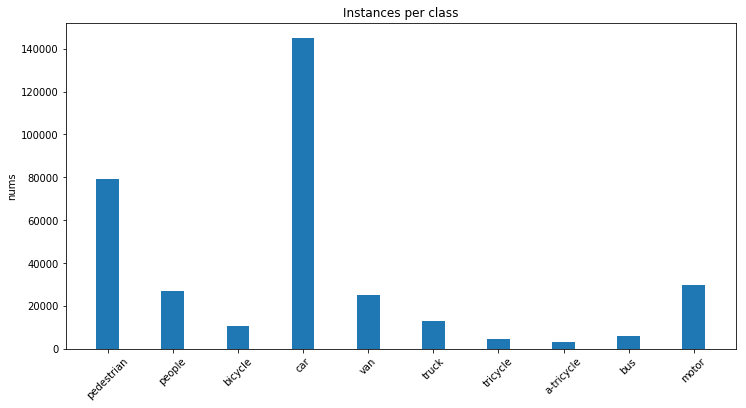

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 400
plt.figure(figsize=(12,6))
ind = np.arange(10)
p1 = plt.bar(ind, label_count.values(), width=0.35)

plt.ylabel('nums')
plt.title('Instances per class')
plt.xticks(ind, ('pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'a-tricycle', 'bus', 'motor'))
plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 81, 10))


plt.savefig('visdrone_cls.jpg')
plt.show()